In [1]:
import tarfile
import numpy as np
import matplotlib.pyplot as plt

df_dict = {
    'parallel': [], 
    'repeat': [], 
    'iter': [], 
    'instructions': [], 
    'cache-misses': [], 
    'ref-cycles': [], 
    'power/energy-pkg/': [], 
    'power/energy-ram/': []
}

NITER=9000
NREPEAT=3

In [2]:
tar = tarfile.open("../results/results.tar.gz")

for parallel in range(1, 89):
    #runALUPerfStat.ITER9000.PARALLEL1.REPEAT3
    df_dict['parallel'].append(parallel)
    df_dict['repeat'].append(NREPEAT)
    df_dict['iter'].append(NITER)
    fname = f"results/runALUPerfStat.ITER{NITER}.PARALLEL{parallel}.REPEAT{NREPEAT}"
    f=tar.extractfile(fname)
    content=f.read()
    decoded_content = content.decode("utf-8")
    for line in decoded_content.split("\n"):
        if len(line) > 0 and '#' not in line:
            t = line.split(",")
            df_dict[t[2]].append(float(t[0])/NREPEAT)

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd


/tmp/ipykernel_673617/1333102316.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.DataFrame(df_dict)

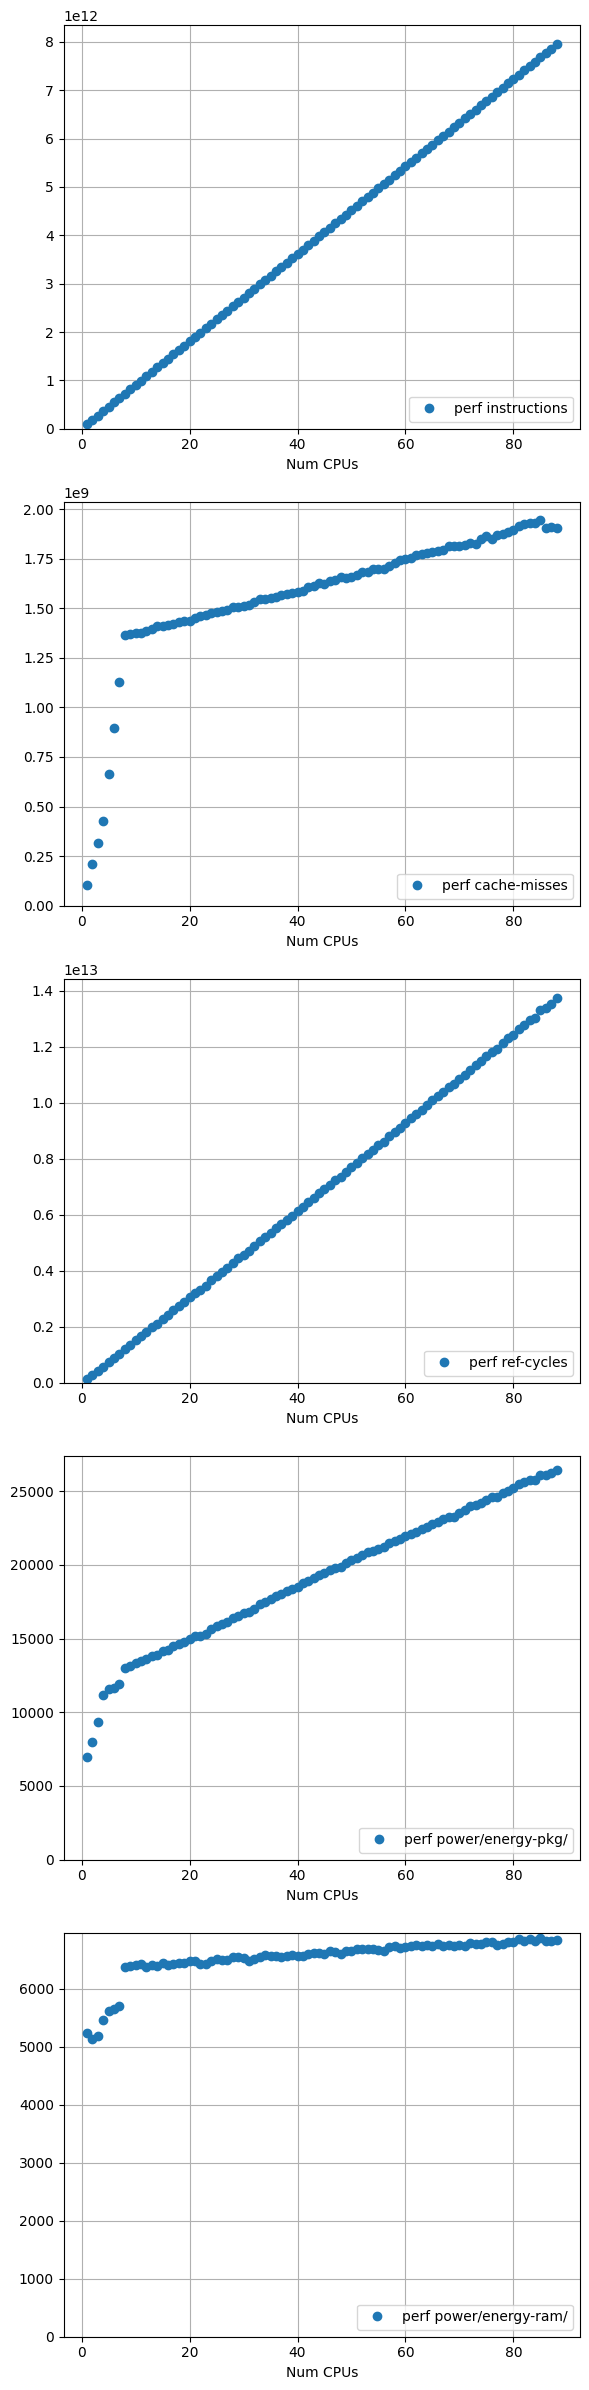

In [5]:
metrics_list = ['instructions', 'cache-misses',
       'ref-cycles', 'power/energy-pkg/', 'power/energy-ram/']

fig, axs = plt.subplots(5, 1, figsize=(6, 24))

for i, ax in enumerate(axs.flat):
    ax.errorbar(df['parallel'], df[metrics_list[i]], fmt="o", label=f"perf {metrics_list[i]}")
    ax.set_xlabel('Num CPUs')
    ax.set_ylim(bottom=0)
    ax.grid(True)
    ax.legend(loc="lower right")
plt.tight_layout()
plt.show()
